# <a id='toc1_'></a>[Exploratory Data Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    

  - [01. Initial Data Inspection](#toc1_1_)    
    - [View Data Structure](#toc1_1_1_)    
    - [Info Summary](#toc1_1_2_)    
    - [Summary Statistics](#toc1_1_3_)    
  - [02. Data Cleansing](#toc1_2_)    
    - [Handle Missing Values](#toc1_2_1_)    
    - [Remove Duplicates](#toc1_2_2_)    
    - [Correct Data Types](#toc1_2_3_)    
    - [Fix Errors](#toc1_2_4_)    
  - [03. Univariate Analysis](#toc1_3_)    
    - [Visualize Distributions](#toc1_3_1_)    
    - [Categorical Analysis](#toc1_3_2_)    
    - [Summary Statistics](#toc1_3_3_)    
  - [04. Bivariate Analysis](#toc1_4_)    
    - [Numerical-Numerical Analysis](#toc1_4_1_)    
    - [Categorical-Numerical Analysis](#toc1_4_2_)    
    - [Categorical-Categorical Analysis](#toc1_4_3_)    
  - [05. Multivariate Analysis:](#toc1_5_)    
    - [Multivariate Visualization](#toc1_5_1_)    
    - [Dimensionality Reduction](#toc1_5_2_)    
  - [06. Detect and Handle Outliers](#toc1_6_)    
    - [Visual Inspection](#toc1_6_1_)    
    - [Handle Outliers](#toc1_6_2_)    
  - [07. Feature Engineering](#toc1_7_)    
    - [Create New Features](#toc1_7_1_)    
    - [Transform Features](#toc1_7_2_)    
  - [08. Data Visualization](#toc1_8_)    
    - [Visualization Tools](#toc1_8_1_)    
    - [Storytelling](#toc1_8_2_)    
  - [09. Summary and Reporting](#toc1_9_)    
    - [Document Findings](#toc1_9_1_)    
    - [Create Reports](#toc1_9_2_)    
  - [10. Hypothesis Testing](#toc1_10_)    
    - [Formulate Hypotheses](#toc1_10_1_)    
    - [Statistical Tests](#toc1_10_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
DETECT_LANGUAGE = True

# Import Libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

# Import Functions
import sys
sys.path.append('../src')
from support_data import detect_language, translate_text

# Options
pd.options.display.float_format = '{:.2f}'.format

In [2]:
train_df = pd.read_csv('../data/train_data.csv')

## <a id='toc1_1_'></a>[01. Initial Data Inspection](#toc0_)

### <a id='toc1_1_1_'></a>[View Data Structure](#toc0_)

In [3]:
train_df.head()

,labels,review_title,text
0,__label__2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,__label__2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,__label__2,Amazing!,This soundtrack is my favorite music of all ti...
3,__label__2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [4]:
train_df.tail()

,labels,review_title,text
3599995,__label__1,Don't do it!!,The high chair looks great when it first comes...
3599996,__label__1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,__label__1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,__label__1,what is it saying?,not sure what this book is supposed to be. It ...
3599999,__label__2,Makes My Blood Run Red-White-And-Blue,I agree that every American should read this b...


In [5]:
train_df.sample(5)

,labels,review_title,text
634854,__label__2,"If you don't have this CD, get it a/s/a/p!!!!","I thought this CD was great! The song ""Sweet E..."
1924900,__label__1,Waste of money,I was so disappointed in this book. I was hopi...
1175887,__label__1,Video Quality Review,I began watching this video on my 22 inch comp...
250887,__label__1,lock up city,this is an example of rotten software...don't ...
1668209,__label__1,should have been better,The book consists of 47 essays by different au...


### <a id='toc1_1_2_'></a>[Info Summary](#toc0_)

In [6]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   labels        object
 1   review_title  object
 2   text          object
dtypes: object(3)
memory usage: 2.0 GB


### <a id='toc1_1_3_'></a>[Summary Statistics](#toc0_)

In [7]:
train_df.describe()

,labels,review_title,text
count,3600000,3591402,3600000
unique,2,2611039,3594900
top,__label__2,Disappointed,"I bought a QPS back in April, I had configurat..."
freq,1800000,9641,15


## <a id='toc1_2_'></a>[02. Data Cleansing](#toc0_)

### <a id='toc1_2_1_'></a>[Handle NaN Values](#toc0_)
Identify and handle missing values using techniques such as imputation, removal, or filling with appropriate values.

In [8]:
train_df.isna().sum().sort_values(ascending = False)

review_title    8598
labels             0
text               0
dtype: int64

In [9]:
train_df['review_title'].fillna('no title', inplace=True)

/tmp/ipykernel_1622/2922635707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['review_title'].fillna('no title', inplace=True)


In [10]:
train_df.isna().sum().sort_values(ascending = False)

labels          0
review_title    0
text            0
dtype: int64

### <a id='toc1_2_2_'></a>[Remove Duplicates](#toc0_)
Identify and remove duplicate rows if they are not needed.

In [11]:
display(train_df.shape)

if train_df.duplicated().any():
    print('Yes, there are duplicates')
    train_df.drop_duplicates(inplace=True)
else:
    print('There are no duplicated values')

display(train_df.shape)

(3600000, 3)

There are no duplicated values


(3600000, 3)

### <a id='toc1_2_3_'></a>[Correct Data Types](#toc0_)
Convert data types if they are incorrect. In this case, the labels can be transformed to numeric values.

In [12]:
train_df['labels'].value_counts()

labels
__label__2    1800000
__label__1    1800000
Name: count, dtype: int64

In [13]:
for label_number in range(1, 3):
    train_df['labels'].replace(f'__label__{label_number}', f'{label_number}', regex=True, inplace=True)

/tmp/ipykernel_1622/2362789662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['labels'].replace(f'__label__{label_number}', f'{label_number}', regex=True, inplace=True)


In [14]:
train_df['labels'] = pd.to_numeric(train_df['labels'], downcast='integer')

In [15]:
train_df['labels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3600000 entries, 0 to 3599999
Series name: labels
Non-Null Count    Dtype
--------------    -----
3600000 non-null  int8 
dtypes: int8(1)
memory usage: 3.4 MB


### <a id='toc1_2_4_'></a>[Fix Errors](#toc0_)
Identify and correct errors or inconsistencies in the data.

In [16]:
if DETECT_LANGUAGE:

    from googletrans import Translator
    translator = Translator()

    spanish_texts = []
    english_translations = []
    english_texts = []

    for text in tqdm(train_df['text'], desc='Text Processing'):

        if detect_language(text) == 'es':
            spanish_texts.append(text)
            translation = translate_text(text, translator)
            english_translations.append(translation)
            english_texts.append(translation)

        else:
            english_texts.append(text)

    train_df['text'] = english_texts

    train_df.to_csv('../data/train_data_preprocessed.csv', index=False)

Text Processing: 100%|██████████| 3600000/3600000 [3:11:57<00:00, 312.58it/s]  


In [24]:
len(spanish_texts)

6096

## <a id='toc1_3_'></a>[03. Univariate Analysis](#toc0_)

### <a id='toc1_3_1_'></a>[Visualize Distributions](#toc0_)
Plot histograms, box plots, and density plots for numerical variables to understand their distributions.

In [19]:
# Number of Words Distribution

import matplotlib.pyplot as plt

train_df['text_words'] = train_df['text'].apply(lambda x: len(x.split()))

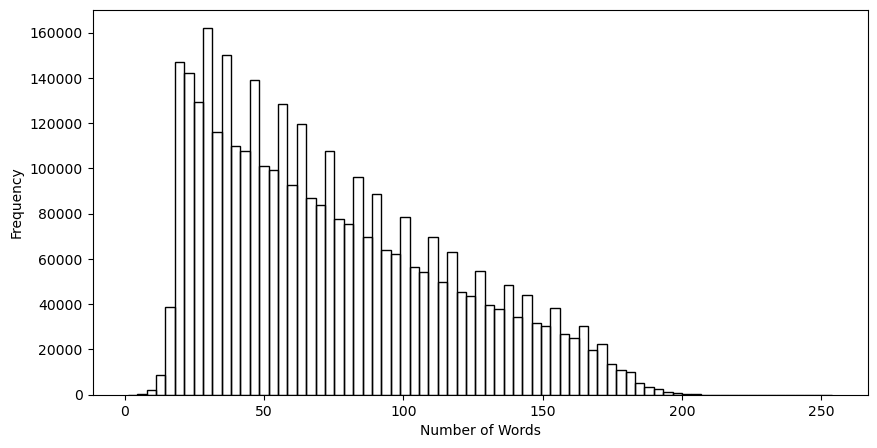

In [20]:
fig = plt.figure(facecolor = 'none', 
    figsize = (10, 5))

ax = fig.add_subplot(111, 
    facecolor='none')

ax.hist(train_df['text_words'], 
    bins=75, 
    edgecolor = 'black',
    facecolor = 'none',
)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### <a id='toc1_3_2_'></a>[Categorical Analysis](#toc0_)
Use bar plots and pie charts for categorical variables to see the distribution of categories.

In [21]:
train_df['labels'].value_counts()

labels
2    1800000
1    1800000
Name: count, dtype: int64

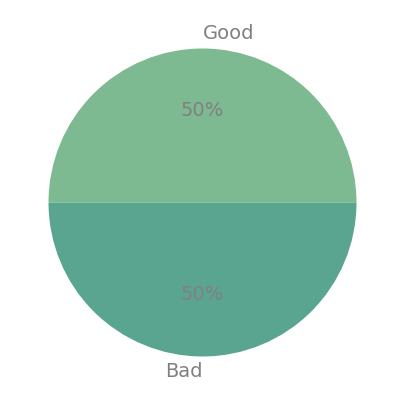

In [25]:
import seaborn as sns

data_labels = train_df['labels'].value_counts().to_list()
labels = ['Good', 'Bad']

plt.figure(figsize = (5, 5), facecolor = 'none')
plt.pie(x=data_labels,
    labels=labels,
    colors=sns.color_palette('crest'), 
    autopct="%.0f%%", 
    textprops={'color': 'grey', 'fontsize': 14})

plt.show()

### <a id='toc1_3_3_'></a>[Summary Statistics](#toc0_)
Calculate mean, median, mode, variance, and standard deviation for numerical data.

In [31]:
train_df.describe()

,labels,text_words
count,3600000.00,3600000.00
mean,1.50,74.21
std,0.50,42.30
min,1.00,1.00
25%,1.00,39.00
50%,1.50,66.00
75%,2.00,103.00
max,2.00,254.00


## <a id='toc1_4_'></a>[04. Bivariate Analysis](#toc0_)

### <a id='toc1_4_1_'></a>[Numerical-Numerical Analysis](#toc0_)
Use scatter plots, correlation matrices, and pair plots to examine relationships between numerical variables.

### <a id='toc1_4_2_'></a>[Categorical-Numerical Analysis](#toc0_)
Use box plots, violin plots, and grouped bar plots to analyze the relationship between categorical and numerical variables.

### <a id='toc1_4_3_'></a>[Categorical-Categorical Analysis](#toc0_)
Use cross-tabulations, heatmaps, and mosaic plots to explore relationships between categorical variables.

## <a id='toc1_5_'></a>[05. Multivariate Analysis:](#toc0_)

### <a id='toc1_5_1_'></a>[Multivariate Visualization](#toc0_)
Use pair plots, parallel coordinate plots, and 3D scatter plots to explore relationships between multiple variables simultaneously.

### <a id='toc1_5_2_'></a>[Dimensionality Reduction](#toc0_)
Apply techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality and visualize complex datasets.

## <a id='toc1_6_'></a>[06. Detect and Handle Outliers](#toc0_)

### <a id='toc1_6_1_'></a>[Visual Inspection](#toc0_)
Use box plots, scatter plots, and z-scores to detect outliers.

### <a id='toc1_6_2_'></a>[Handle Outliers](#toc0_)
Decide whether to remove, transform, or cap outliers based on their impact on the analysis.

## <a id='toc1_7_'></a>[07. Feature Engineering](#toc0_)

### <a id='toc1_7_1_'></a>[Create New Features](#toc0_)
Derive new features from existing ones to enhance the dataset.

### <a id='toc1_7_2_'></a>[Transform Features](#toc0_)
Apply transformations such as scaling, encoding categorical variables, and creating polynomial features.

## <a id='toc1_8_'></a>[08. Data Visualization](#toc0_)

### <a id='toc1_8_1_'></a>[Visualization Tools](#toc0_)
Use libraries like Matplotlib, Seaborn, and Plotly to create informative and interactive visualizations.

### <a id='toc1_8_2_'></a>[Storytelling](#toc0_)
Create visualizations that help tell a compelling story about the data.

## <a id='toc1_9_'></a>[09. Summary and Reporting](#toc0_)

### <a id='toc1_9_1_'></a>[Document Findings](#toc0_)
Summarize key insights and findings from the EDA.

### <a id='toc1_9_2_'></a>[Create Reports](#toc0_)
Compile the analysis into a report or presentation format, including visualizations and interpretations.

## <a id='toc1_10_'></a>[10. Hypothesis Testing](#toc0_)

### <a id='toc1_10_1_'></a>[Formulate Hypotheses](#toc0_)
Based on initial findings, formulate hypotheses about the data.

### <a id='toc1_10_2_'></a>[Statistical Tests](#toc0_)
Conduct statistical tests (e.g., t-tests, chi-square tests) to validate hypotheses.